YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


<Figure size 1000x500 with 0 Axes>

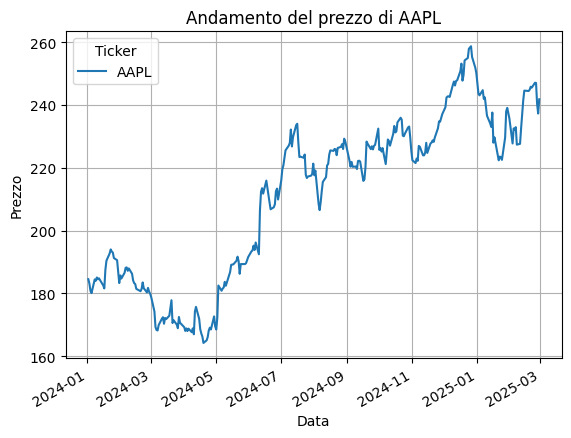

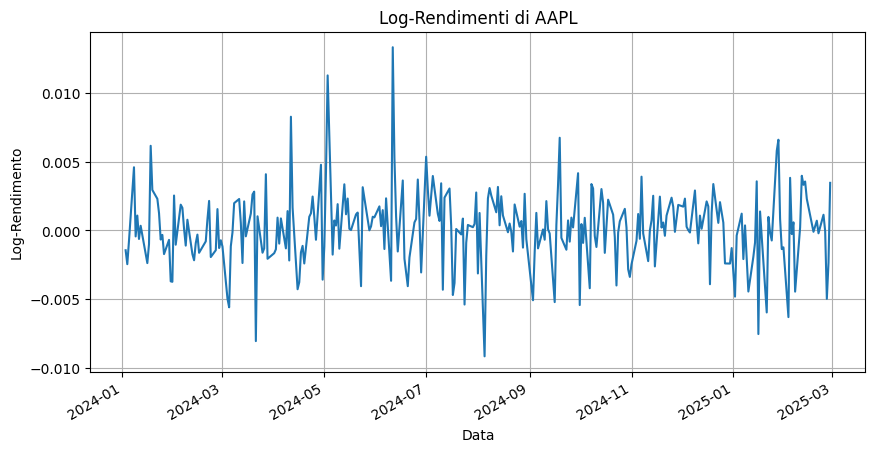

Statistiche dei log-rendimenti di AAPL:
---------------------------------------
Media: 0.000178
Deviazione Standard: 0.002742
Asimmetria (Skewness): 0.266556
Curtosi (Excess Kurtosis): 2.770391

Test di normalità - Shapiro-Wilk:
  Statistica: 0.964514  p-value: 0.000002
Test di normalità - Jarque-Bera:
  Statistica: 96.174547  p-value: 0.000000



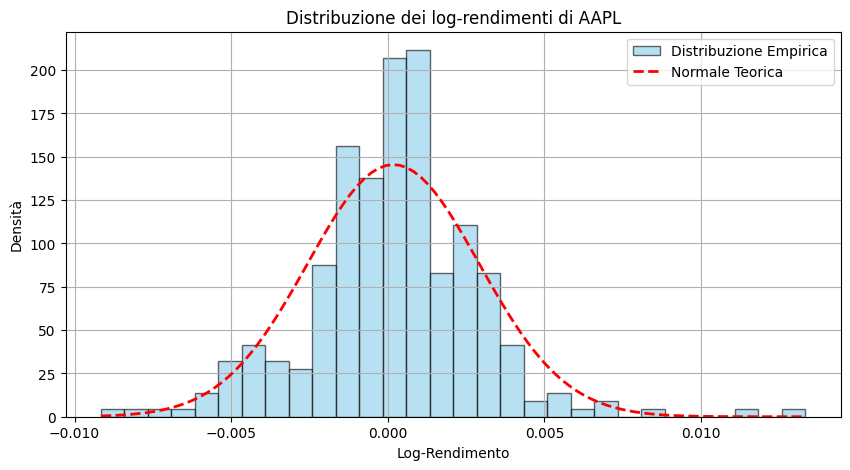

<Figure size 800x600 with 0 Axes>

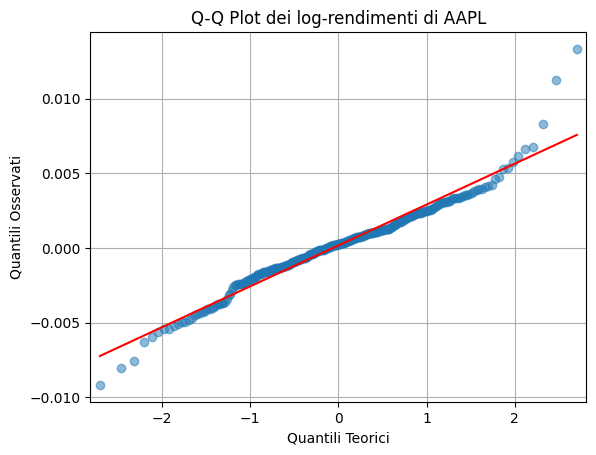

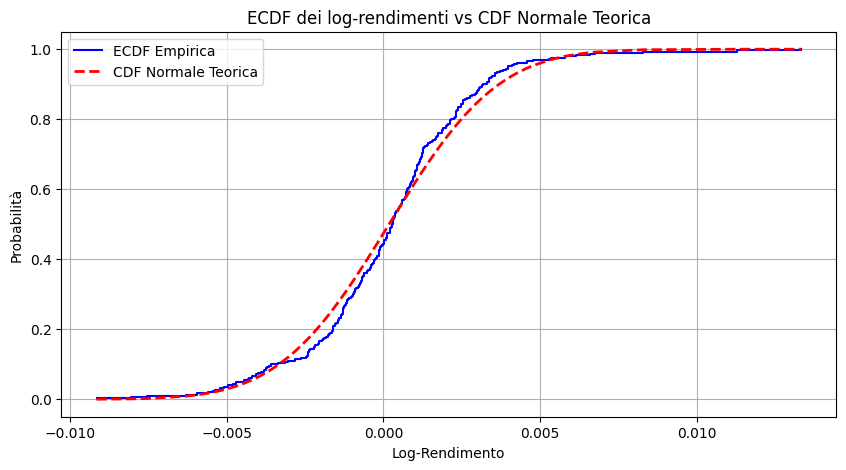

Analisi delle probabilità:
---------------------------
Probabilità empirica di log-rendimento < -0.02: 0.0000
Probabilità teorica (normale) di log-rendimento < -0.02: 0.0000


In [ ]:
### -----------------------  ANALISI RENDIMENTI


import pandas as pd       # Importiamo alcune librerie
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import shapiro, jarque_bera, skew, kurtosis, norm
import statsmodels.api as sm

stocks = ['AAPL']                       # Definiamo il ticker
start = datetime(2024, 1, 1)              # Data di inizio del record
data = yf.download(stocks, start=start)   # Scarichiamo i dati
close = data.loc[:, "Close"]

# Plottiamo
plt.figure(figsize=(10, 5))
close.plot(title="Andamento del prezzo di AAPL")
plt.xlabel("Data")
plt.ylabel("Prezzo")
plt.grid(True)
plt.show()

close = close.squeeze() # Convertiamo in Series perchè è un dataFrame
log_returns = np.log(close).pct_change()

# Creiamo una Series utilizzando come indice le date (escludendo la prima data)
returns = pd.Series(log_returns, index=close.index[1:])

# Plottiamo i log-rendimenti nel tempo
plt.figure(figsize=(10, 5))
returns.plot(title="Log-Rendimenti di AAPL")
plt.xlabel("Data")
plt.ylabel("Log-Rendimento")
plt.grid(True)
plt.show()


### Calcolo delle statistiche

media = returns.mean()
dev_std = returns.std()  # Deviazione standard campionaria
asimmetria = skew(returns)
curtosi = kurtosis(returns)  # Curtosi in eccesso (0 per una normale)

print("Statistiche dei log-rendimenti di AAPL:")
print("---------------------------------------")
print(f"Media: {media:.6f}")
print(f"Deviazione Standard: {dev_std:.6f}")
print(f"Asimmetria (Skewness): {asimmetria:.6f}")
print(f"Curtosi (Excess Kurtosis): {curtosi:.6f}\n")

### Test di normalità
shapiro_stat, shapiro_p = shapiro(returns) # Test di Shapiro-Wilk
jb_stat, jb_p = jarque_bera(returns) # Test di Jarque-Bera

print("Test di normalità - Shapiro-Wilk:")
print(f"  Statistica: {shapiro_stat:.6f}  p-value: {shapiro_p:.6f}")
print("Test di normalità - Jarque-Bera:")
print(f"  Statistica: {jb_stat:.6f}  p-value: {jb_p:.6f}\n")


### Visualizzazione della distribuzione dei log-rendimenti
# -------------------------
plt.figure(figsize=(10, 5))
# Istogramma dei log-rendimenti (densità)
n, bins, patches = plt.hist(returns, bins=30, density=True, alpha=0.6,
                            color='skyblue', edgecolor='black', label='Distribuzione Empirica')

### Calcolo della curva della distribuzione normale teorica
x = np.linspace(bins[0], bins[-1], 100)
plt.plot(x, norm.pdf(x, media, dev_std), 'r--', linewidth=2, label='Normale Teorica')

plt.title("Distribuzione dei log-rendimenti di AAPL")
plt.xlabel("Log-Rendimento")
plt.ylabel("Densità")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
### Q–Q plot per la verifica della normalità
#
plt.figure(figsize=(8, 6))
sm.qqplot(returns, line='s', marker='o', alpha=0.5)
plt.title("Q-Q Plot dei log-rendimenti di AAPL")
plt.xlabel("Quantili Teorici")
plt.ylabel("Quantili Osservati")
plt.grid(True)
plt.show()

# --------------------------
#  Analisi della funzione di distribuzione empirica(ECDF)
sorted_returns = np.sort(returns)
n_points = len(sorted_returns)
ecdf = np.arange(1, n_points+1) / n_points

plt.figure(figsize=(10, 5))
plt.step(sorted_returns, ecdf, where='post', label='ECDF Empirica', color='blue')

# Calcolo della CDF della normale teorica usando i parametri stimati
cdf_theoretical = norm.cdf(sorted_returns, loc=media, scale=dev_std)
plt.plot(sorted_returns, cdf_theoretical, 'r--', label='CDF Normale Teorica', linewidth=2)

plt.title("ECDF dei log-rendimenti vs CDF Normale Teorica")
plt.xlabel("Log-Rendimento")
plt.ylabel("Probabilità")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
#  Analisi delle probabilità in termini di quantili
# ---------------------------
# Ad esempio: calcoliamo la probabilità di osservare un log-rendimento inferiore a -0.02
threshold = -0.02
prob_empirica = np.mean(returns < threshold)
prob_theoretical = norm.cdf(threshold, loc=media, scale=dev_std)

print("Analisi delle probabilità:")
print("---------------------------")
print(f"Probabilità empirica di log-rendimento < {threshold}: {prob_empirica:.4f}")
print(f"Probabilità teorica (normale) di log-rendimento < {threshold}: {prob_theoretical:.4f}")
